# Healthcare - Persistency of a drug Group Project

One of the challenge for all Pharmaceutical companies is to understand the persistency of drug as per the physician prescription. To solve this problem ABC pharma company approached an analytics company to automate this process of identification. 

The main objective is to build a classification model to predict the NTM drug persistence of patients based on several factors.


## Data Import

In [26]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('data/Healthcare_dataset.csv')

In [3]:
df.head()

Ptid Persistency_Flag  Gender           Race     Ethnicity   Region  \
0   P1       Persistent    Male      Caucasian  Not Hispanic     West   
1   P2   Non-Persistent    Male          Asian  Not Hispanic     West   
2   P3   Non-Persistent  Female  Other/Unknown      Hispanic  Midwest   
3   P4   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   
4   P5   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   

  Age_Bucket        Ntm_Speciality Ntm_Specialist_Flag  \
0        >75  GENERAL PRACTITIONER              Others   
1      55-65  GENERAL PRACTITIONER              Others   
2      65-75  GENERAL PRACTITIONER              Others   
3        >75  GENERAL PRACTITIONER              Others   
4        >75  GENERAL PRACTITIONER              Others   

       Ntm_Speciality_Bucket  ... Risk_Family_History_Of_Osteoporosis  \
0  OB/GYN/Others/PCP/Unknown  ...                                   N   
1  OB/GYN/Others/PCP/Unknown  ...                                   N   
2  OB/GYN/Others/PCP/Unknown  ...                                   N   
3  OB/GYN/Others/PCP/Unknown  ...                                   N   
4  OB/GYN/Others/PCP/Unknown  ...                                   N   

  Risk_Low_Calcium_Intake  Risk_Vitamin_D_Insufficiency  \
0                       N                             N   
1                       N                             N   
2                       Y                             N   
3                       N                             N   
4                       N                             N   

  Risk_Poor_Health_Frailty Risk_Excessive_Thinness  \
0                        N                       N   
1                        N                       N   
2                        N                       N   
3                        N                       N   
4                        N                       N   

  Risk_Hysterectomy_Oophorectomy Risk_Estrogen_Deficiency Risk_Immobilization  \
0                              N                        N                   N   
1                              N                        N                   N   
2                              N                        N                   N   
3                              N                        N                   N   
4                              N                        N                   N   

  Risk_Recurring_Falls Count_Of_Risks  
0                    N              0  
1                    N              0  
2                    N              2  
3                    N              1  
4                    N              1  

[5 rows x 69 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [5]:
df.describe()

Dexa_Freq_During_Rx  Count_Of_Risks
count          3424.000000     3424.000000
mean              3.016063        1.239486
std               8.136545        1.094914
min               0.000000        0.000000
25%               0.000000        0.000000
50%               0.000000        1.000000
75%               3.000000        2.000000
max             146.000000        7.000000

In [6]:
df_info = pd.read_csv('data/Healthcare_info.csv')

In [7]:
df_info = df_info[['Variable', 'Variable Description']]

In [8]:
# Variables in the dataset
df_info

df_info.iloc[[23,24]]['Variable Description'].tolist()

['Comorbidities are divided into two main categories - Acute and chronic, based on the ICD codes. For chronic disease we are taking complete look back from the first Rx date of NTM therapy and for acute diseases, time period  before the NTM OP Rx with one year lookback has been applied',
 'Concomitant drugs recorded prior to starting with a therapy(within 365 days prior from first rxdate)']

## Data Preprocessing

In [9]:
df['Idn_Indicator'].value_counts()

Y    2557
N     867
Name: Idn_Indicator, dtype: int64

In [10]:
len(df['Injectable_Experience_During_Rx'].unique())

2

In [11]:
cols = df.columns

In [12]:
# check boolean cloumns
bool_cols = []
other_cols = []
for i in cols:
    values = df[i].unique()
    if len(values) == 2 and (values[0] == 'Y' or values[0] == 'N'):
        bool_cols.append(i)
    else:
        other_cols.append(i)
bool_cols

['Gluco_Record_Prior_Ntm',
 'Gluco_Record_During_Rx',
 'Dexa_During_Rx',
 'Frag_Frac_Prior_Ntm',
 'Frag_Frac_During_Rx',
 'Idn_Indicator',
 'Injectable_Experience_During_Rx',
 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
 'Comorb_Encounter_For_Immunization',
 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
 'Comorb_Vitamin_D_Deficiency',
 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
 'Comorb_Long_Term_Current_Drug_Therapy',
 'Comorb_Dorsalgia',
 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
 'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
 'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias',
 'Comorb_Osteoporosis_without_current_pathological_fracture',
 'Comorb_Personal_history_of_malignant_neoplasm',
 'Comorb_Gastro_esophageal_reflux_disease',
 'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations',
 'Concom_Narcotics',
 'Concom_S

In [13]:
# Other type of features
other_cols

['Ptid',
 'Persistency_Flag',
 'Gender',
 'Race',
 'Ethnicity',
 'Region',
 'Age_Bucket',
 'Ntm_Speciality',
 'Ntm_Specialist_Flag',
 'Ntm_Speciality_Bucket',
 'Dexa_Freq_During_Rx',
 'Risk_Segment_Prior_Ntm',
 'Tscore_Bucket_Prior_Ntm',
 'Risk_Segment_During_Rx',
 'Tscore_Bucket_During_Rx',
 'Change_T_Score',
 'Change_Risk_Segment',
 'Adherent_Flag',
 'Count_Of_Risks']

In [14]:
df['Ntm_Speciality'].unique()

array(['GENERAL PRACTITIONER', 'Unknown', 'ENDOCRINOLOGY', 'RHEUMATOLOGY',
       'ONCOLOGY', 'PATHOLOGY', 'OBSTETRICS AND GYNECOLOGY',
       'PSYCHIATRY AND NEUROLOGY', 'ORTHOPEDIC SURGERY',
       'PHYSICAL MEDICINE AND REHABILITATION',
       'SURGERY AND SURGICAL SPECIALTIES', 'PEDIATRICS',
       'PULMONARY MEDICINE', 'HEMATOLOGY & ONCOLOGY', 'UROLOGY',
       'PAIN MEDICINE', 'NEUROLOGY', 'RADIOLOGY', 'GASTROENTEROLOGY',
       'EMERGENCY MEDICINE', 'PODIATRY', 'OPHTHALMOLOGY',
       'OCCUPATIONAL MEDICINE', 'TRANSPLANT SURGERY', 'PLASTIC SURGERY',
       'CLINICAL NURSE SPECIALIST', 'OTOLARYNGOLOGY', 'HOSPITAL MEDICINE',
       'ORTHOPEDICS', 'NEPHROLOGY', 'GERIATRIC MEDICINE',
       'HOSPICE AND PALLIATIVE MEDICINE',
       'OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY',
       'VASCULAR SURGERY', 'CARDIOLOGY', 'NUCLEAR MEDICINE'], dtype=object)

In [15]:
df[other_cols].drop('Persistency_Flag', axis=1)

Ptid  Gender           Race     Ethnicity   Region Age_Bucket  \
0        P1    Male      Caucasian  Not Hispanic     West        >75   
1        P2    Male          Asian  Not Hispanic     West      55-65   
2        P3  Female  Other/Unknown      Hispanic  Midwest      65-75   
3        P4  Female      Caucasian  Not Hispanic  Midwest        >75   
4        P5  Female      Caucasian  Not Hispanic  Midwest        >75   
...     ...     ...            ...           ...      ...        ...   
3419  P3420  Female      Caucasian  Not Hispanic    South        >75   
3420  P3421  Female      Caucasian  Not Hispanic    South        >75   
3421  P3422  Female      Caucasian  Not Hispanic    South        >75   
3422  P3423  Female      Caucasian  Not Hispanic    South      55-65   
3423  P3424  Female      Caucasian  Not Hispanic    South      65-75   

            Ntm_Speciality Ntm_Specialist_Flag      Ntm_Speciality_Bucket  \
0     GENERAL PRACTITIONER              Others  OB/GYN/Others/PCP/Unknown   
1     GENERAL PRACTITIONER              Others  OB/GYN/Others/PCP/Unknown   
2     GENERAL PRACTITIONER              Others  OB/GYN/Others/PCP/Unknown   
3     GENERAL PRACTITIONER              Others  OB/GYN/Others/PCP/Unknown   
4     GENERAL PRACTITIONER              Others  OB/GYN/Others/PCP/Unknown   
...                    ...                 ...                        ...   
3419  GENERAL PRACTITIONER              Others  OB/GYN/Others/PCP/Unknown   
3420               Unknown              Others  OB/GYN/Others/PCP/Unknown   
3421         ENDOCRINOLOGY          Specialist               Endo/Onc/Uro   
3422               Unknown              Others  OB/GYN/Others/PCP/Unknown   
3423               Unknown              Others  OB/GYN/Others/PCP/Unknown   

      Dexa_Freq_During_Rx Risk_Segment_Prior_Ntm Tscore_Bucket_Prior_Ntm  \
0                       0                 VLR_LR                   >-2.5   
1                       0                 VLR_LR                   >-2.5   
2                       0                 HR_VHR                  <=-2.5   
3                       0                 HR_VHR                   >-2.5   
4                       0                 HR_VHR                  <=-2.5   
...                   ...                    ...                     ...   
3419                    0                 VLR_LR                   >-2.5   
3420                    0                 HR_VHR                  <=-2.5   
3421                    7                 VLR_LR                   >-2.5   
3422                    0                 VLR_LR                   >-2.5   
3423                    0                 VLR_LR                   >-2.5   

     Risk_Segment_During_Rx Tscore_Bucket_During_Rx Change_T_Score  \
0                    VLR_LR                  <=-2.5      No change   
1                   Unknown                 Unknown        Unknown   
2                    HR_VHR                  <=-2.5      No change   
3                    HR_VHR                  <=-2.5      No change   
4                   Unknown                 Unknown        Unknown   
...                     ...                     ...            ...   
3419                Unknown                 Unknown        Unknown   
3420                Unknown                 Unknown        Unknown   
3421                 HR_VHR                  <=-2.5      No change   
3422                Unknown                 Unknown        Unknown   
3423                Unknown                 Unknown        Unknown   

     Change_Risk_Segment Adherent_Flag  Count_Of_Risks  
0                Unknown      Adherent               0  
1                Unknown      Adherent               0  
2              No change      Adherent               2  
3              No change      Adherent               1  
4                Unknown      Adherent               1  
...                  ...           ...             ...  
3419             Unknown      Adherent               1  
3420   

In [25]:
df.select_dtypes(exclude='object').describe()

Dexa_Freq_During_Rx  Count_Of_Risks
count          3424.000000     3424.000000
mean              3.016063        1.239486
std               8.136545        1.094914
min               0.000000        0.000000
25%               0.000000        0.000000
50%               0.000000        1.000000
75%               3.000000        2.000000
max             146.000000        7.000000

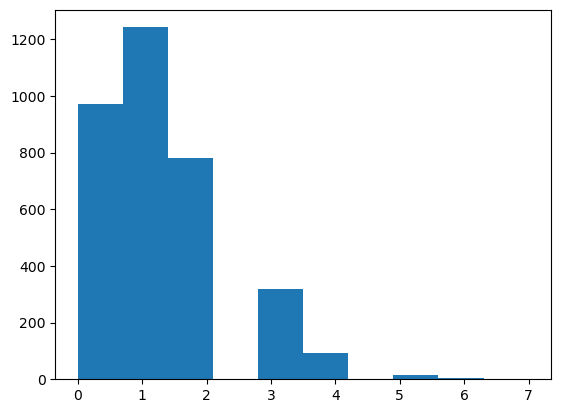

In [30]:
plt.hist(x=df['Count_Of_Risks'])

plt.show()

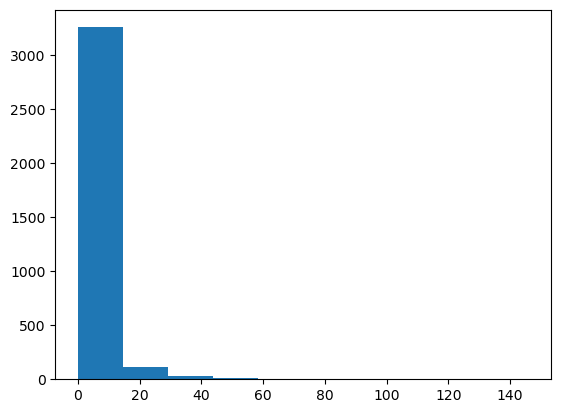

In [46]:
plt.hist(x=df['Dexa_Freq_During_Rx'])

plt.show()

In [17]:
df.Persistency_Flag.value_counts()

Non-Persistent    2135
Persistent        1289
Name: Persistency_Flag, dtype: int64

In [18]:
df.Age_Bucket.value_counts()

>75      1439
65-75    1086
55-65     733
<55       166
Name: Age_Bucket, dtype: int64